In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### GRA: 13 16 20 24 27
#### Phos: 22 22 25 29 33 
#### MoS2: 28 35 39 42 47

In [2]:
mat = 'phos'
atoms = '33'
run = '1'

In [3]:
a = np.genfromtxt('%s.%s.100.%s.count_in_z.txt' %(mat,atoms,run),delimiter = ' ', dtype = int, skip_header = 1, invalid_raise = False)
b = np.genfromtxt('%s.%s.150.%s.count_in_z.txt' %(mat,atoms,run),delimiter = ' ', dtype = int, skip_header = 1, invalid_raise = False)
c = np.genfromtxt('%s.%s.200.%s.count_in_z.txt' %(mat,atoms,run),delimiter = ' ', dtype = int, skip_header = 1, invalid_raise = False)
d = np.genfromtxt('%s.%s.250.%s.count_in_z.txt' %(mat,atoms,run),delimiter = ' ', dtype = int, skip_header = 1, invalid_raise = False)
e = np.genfromtxt('%s.%s.300.%s.count_in_z.txt' %(mat,atoms,run),delimiter = ' ', dtype = int, skip_header = 1, invalid_raise = False)

In [4]:
def calculation(ciz,material):
    wall = 21
    if (material == 'gra'):
        wall = 20
    elif(material == 'phos'):
        wall = 21
    potassium = ciz[:,0:41]
    chloride = ciz[:,41:82]
    water = ciz[:,82:123]
    p_before = potassium[:,0:wall]
    p_after = potassium[:,wall:41]
    c_before = chloride[:,0:wall]
    c_after = chloride[:,wall:41]
    w_before = water[:,0:wall]
    w_after = water[:,wall:41]
    p_total = np.sum(potassium[0,:])
    c_total = np.sum(chloride[0,:])
    w_total = int(np.ceil(np.sum(water[0,:])/3))
    ions_after = p_after+c_after
    ions_after = np.sum(ions_after,axis =1)
    unfiltered = max(ions_after)
    total_ion = 14630-14475
    rejection_rate = (total_ion-unfiltered)/total_ion*100
    w_filtered = np.sum(w_after,axis =1)
    w_filtered = (w_filtered - w_filtered[0])/3
    return rejection_rate, w_filtered

In [5]:
def plot_flux(w_filtered, up=None):
    ################################################################
    #up is the upper limit of the curve, to cut off the petered-out part
    if up is None:
        up = 10000;
    top = np.where(w_filtered<620)[0][-1]
    ################################################################
    timesteps = list(range(len(w_filtered)))
    timesteps[:] = [ts/1000 for ts in timesteps]
    t = np.vstack([timesteps, np.ones(len(timesteps))]).T
    m,k = np.linalg.lstsq(t[0:top],w_filtered[0:top],rcond = None)[0]
    plt.plot(timesteps[0:top],w_filtered[0:top], linewidth = 0.8)
    #plt.plot(timesteps[0:up],fitted[0:up])
    plt.ylabel('Filtered water molecules(#)', fontsize = 10)
    plt.xlabel('Time (ns)', fontsize = 10)
    plt.title('Pressure = 100 GPa',fontsize = 10)
    print('Calculated flux is', m, 'water molecules per ns')
    return m

In [6]:
#Graphene
rej_a, water_a = calculation(a,mat)
rej_b, water_b = calculation(b,mat)
rej_c, water_c = calculation(c,mat)
rej_d, water_d = calculation(d,mat)
rej_e, water_e = calculation(e,mat)
rej = [rej_a,rej_b,rej_c,rej_d,rej_e]
print(rej)

[89.6774193548387, 85.16129032258064, 78.06451612903226, 72.90322580645162, 72.25806451612902]


Calculated flux is 109.52999777504803 water molecules per ns
Calculated flux is 160.22085022745694 water molecules per ns
Calculated flux is 201.43505956564562 water molecules per ns
Calculated flux is 243.72056679517706 water molecules per ns
Calculated flux is 268.8159204750065 water molecules per ns


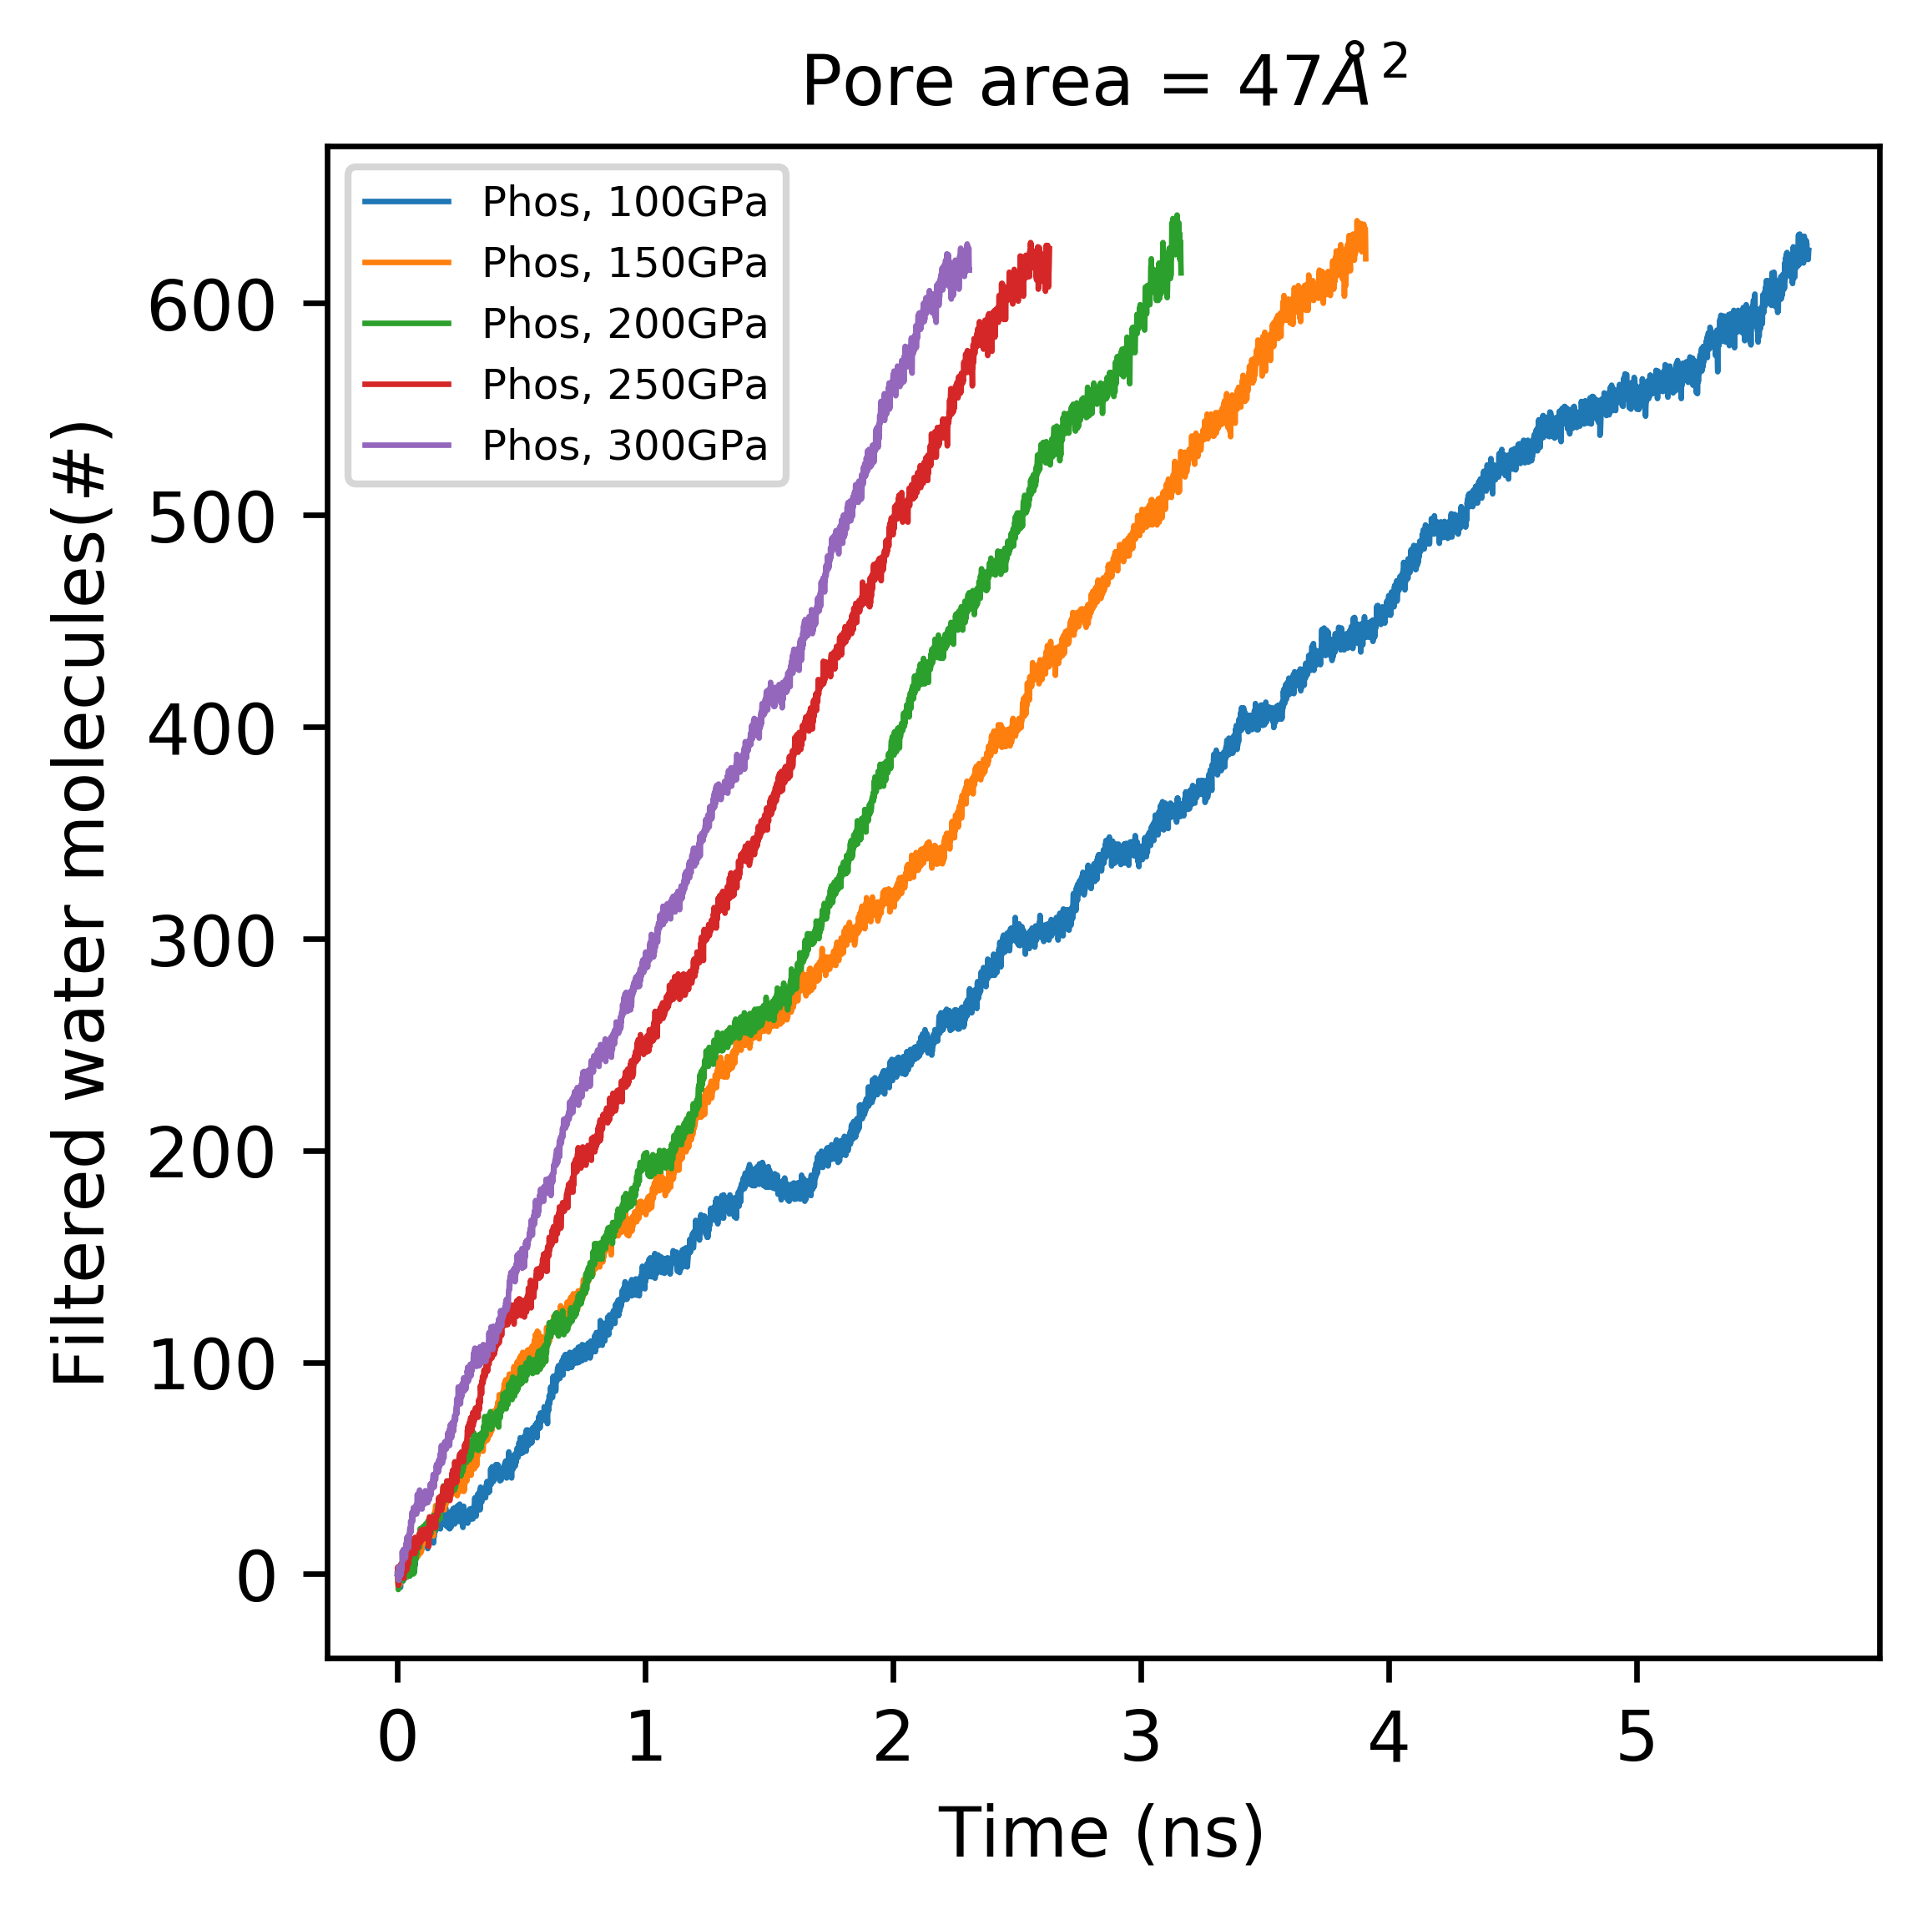

In [7]:
plt.figure(figsize = [4, 4], dpi = 600)

f_a = plot_flux(water_a)
f_b = plot_flux(water_b)
f_c = plot_flux(water_c)
f_d = plot_flux(water_d)
f_e = plot_flux(water_e)

plt.legend(('Phos, 100GPa', 'Phos, 150GPa', 'Phos, 200GPa', 
            'Phos, 250GPa', 'Phos, 300GPa'), 
             loc='upper left', fontsize = 6)
plt.title(r'Pore area = 47$\AA^2$',fontsize = 10)
plt.show()

In [8]:
a = np.asarray([[0,10],[1,20],[2,30],[3,40],[4,50]])

In [9]:
np.where(water_c<690)

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

In [10]:
water_a

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       6.93666667e+02, 6.98666667e+02, 6.98333333e+02])